In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imtools

In [4]:
filename = 'bearing_soft.jpg'

img = Image.open(filename).convert('L')
img.thumbnail((512,512))
img_array = np.array(img, dtype='f')

In [5]:
def linear_trans(img_array):
    return img_array

def inverse_trans(img_array):
    return 255 - img_array

def clamping_trans(img_array):
    # clamp to interval [100,200]
    return (100/255) * img_array + 100

def power_trans(img_array, pow=2):
    return 255.0 * (img_array/255.0)**pow

space = np.linspace(0, 255, 255)

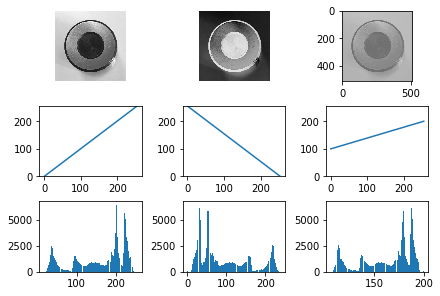

In [6]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
img_array = np.array(img)

# pictues
ax[0, 0].imshow(linear_trans(img_array), cmap='gray', vmin=0, vmax=255)
ax[0, 1].imshow(inverse_trans(img_array), cmap='gray', vmin=0, vmax=255)
ax[0, 2].imshow(clamping_trans(img_array), cmap='gray', vmin=0, vmax=255)

for i in range(2):
    ax[0, i].axis('off')

# transformations
ax[1, 0].plot(linear_trans(space))
ax[1, 0].set_ylim([0,255])
ax[1, 1].plot(inverse_trans(space))
ax[1, 1].set_ylim([0,255])
ax[1, 2].plot(clamping_trans(space))
ax[1, 2].set_ylim([0,255])

ax[2, 0].hist(linear_trans(img_array).flatten(), bins= 256)
ax[2, 1].hist(inverse_trans(img_array).flatten(), bins= 256)
ax[2, 2].hist(clamping_trans(img_array).flatten(), bins= 256)

fig.savefig('graylevel_transform.jpg', dpi=300)

In [7]:
plt.show(fig)